In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Saving Ben Tennyson.jpg to Ben Tennyson (1).jpg


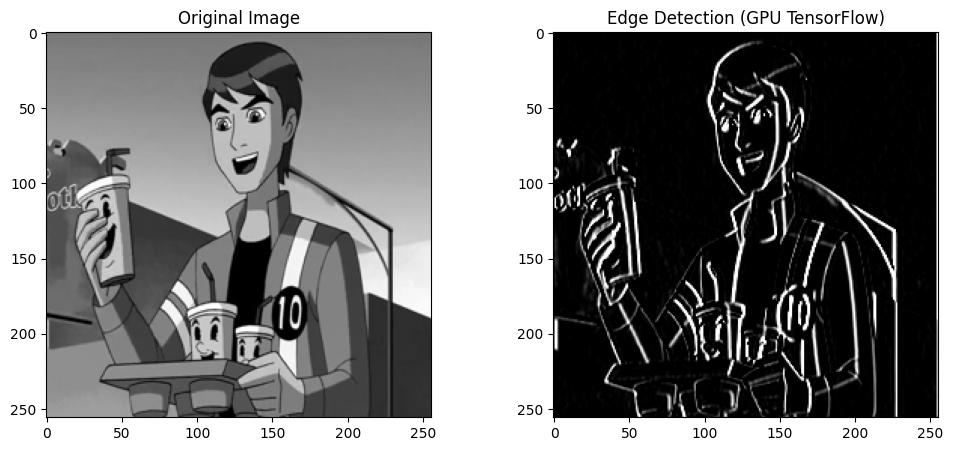

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Upload your image
uploaded = files.upload()
filename = next(iter(uploaded))

# Load and preprocess image
img = Image.open(filename).convert('L')
img = img.resize((256, 256))  # Resize to 256x256
img_np = np.array(img) / 255.0
img_tf = tf.convert_to_tensor(img_np[None, ..., None], dtype=tf.float32)

# Define Sobel kernel
sobel_x = tf.constant([[1, 0, -1],
                       [2, 0, -2],
                       [1, 0, -1]], dtype=tf.float32)
sobel_x = tf.reshape(sobel_x, [3, 3, 1, 1])

# GPU-based convolution
@tf.function
def edge_detect(x):
    return tf.nn.conv2d(x, sobel_x, strides=1, padding='SAME')

with tf.device('/GPU:0'):
    result_tf = edge_detect(img_tf)

# Convert to numpy for saving
result_np = tf.squeeze(result_tf).numpy()
result_np = np.clip(result_np * 255.0, 0, 255).astype(np.uint8)

# Display results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_np, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(result_np, cmap='gray')
plt.title("Edge Detection (GPU TensorFlow)")
plt.show()


In [4]:
from PIL import Image
from google.colab import files

# Save edge-detected image
Image.fromarray(result_np).save("gpu_output_tf.png")

# Save simple execution log
with open("log.txt", "w") as f:
    f.write("Edge detection using TensorFlow with GPU\n")

# Download results
files.download("gpu_output_tf.png")
files.download("log.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>